In [172]:
# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### **Load Dataset**

In [173]:
df = pd.read_csv("second_hand_cars.csv")

print(df.shape)
df.head()

(2500, 16)


,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,NaN
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,NaN
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


In [174]:
df.shape

# check datatypes
print(df.dtypes)

Company Name                object
Car Name                    object
Variant                     object
Fuel Type                   object
Tyre Condition              object
Make Year                    int64
Owner Type                  object
Registration Number         object
Mileage                      int64
Price                        int64
Transmission Type           object
Body Color                  object
Service Record              object
Insurance                   object
Registration Certificate    object
Accessories                 object
dtype: object


### **Data cleaning**

In [175]:
# check missing values
print(df.isnull().sum())

# handle missing values (median for numerical, mode for categorical)
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

Company Name                  0
Car Name                      0
Variant                     262
Fuel Type                     0
Tyre Condition                0
Make Year                     0
Owner Type                    0
Registration Number           0
Mileage                       0
Price                         0
Transmission Type             0
Body Color                    0
Service Record                0
Insurance                     0
Registration Certificate      0
Accessories                 482
dtype: int64


C:\Users\Yvonne\AppData\Local\Temp\ipykernel_17952\1607266090.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Yvonne\AppData\Local\Temp\ipykernel_17952\1607266090.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [176]:
# drop duplicates
df.drop_duplicates(inplace=True)

# # Remove outliers in price/mileage
# Q1 = df['Price'].quantile(0.25)
# Q3 = df['Price'].quantile(0.75)
# IQR = Q3 - Q1
# df = df[(df['Price'] >= Q1 - 1.5*IQR) & (df['Price'] <= Q3 + 1.5*IQR)]

#df[(df['Price'] >= lower) & (df['Price'] <= upper)] keeps only rows within these bounds(outlier boundaries- Tukey's rule).
#Rows outside are removed (outliers dropped).

# print(df.shape)

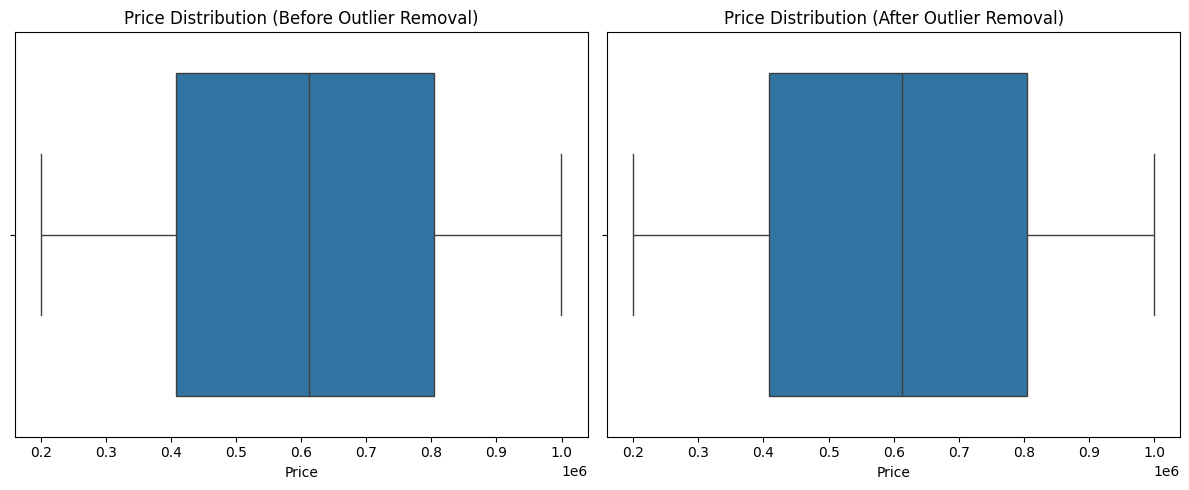

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Before Outlier Removal ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['Price'])
plt.title("Price Distribution (Before Outlier Removal)")

# --- Outlier Removal ---
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_clean = df[(df['Price'] >= lower) & (df['Price'] <= upper)]

# --- After Outlier Removal ---
plt.subplot(1,2,2)
sns.boxplot(x=df_clean['Price'])
plt.title("Price Distribution (After Outlier Removal)")

plt.tight_layout()
plt.show()


### **Exploratory Data Analysis (EDA)**

In [178]:
# Summary statistics
print(df.describe())

         Make Year        Mileage          Price
count  2500.000000    2500.000000    2500.000000
mean   2019.521600  104777.792000  608120.897600
std       2.894146   55544.487467  231056.126713
min    2015.000000   10010.000000  200176.000000
25%    2017.000000   56313.000000  407791.000000
50%    2020.000000  104209.500000  612012.500000
75%    2022.000000  152149.250000  804567.000000
max    2024.000000  199755.000000  999826.000000


In [179]:
df.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,Sunroof
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,Sunroof
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


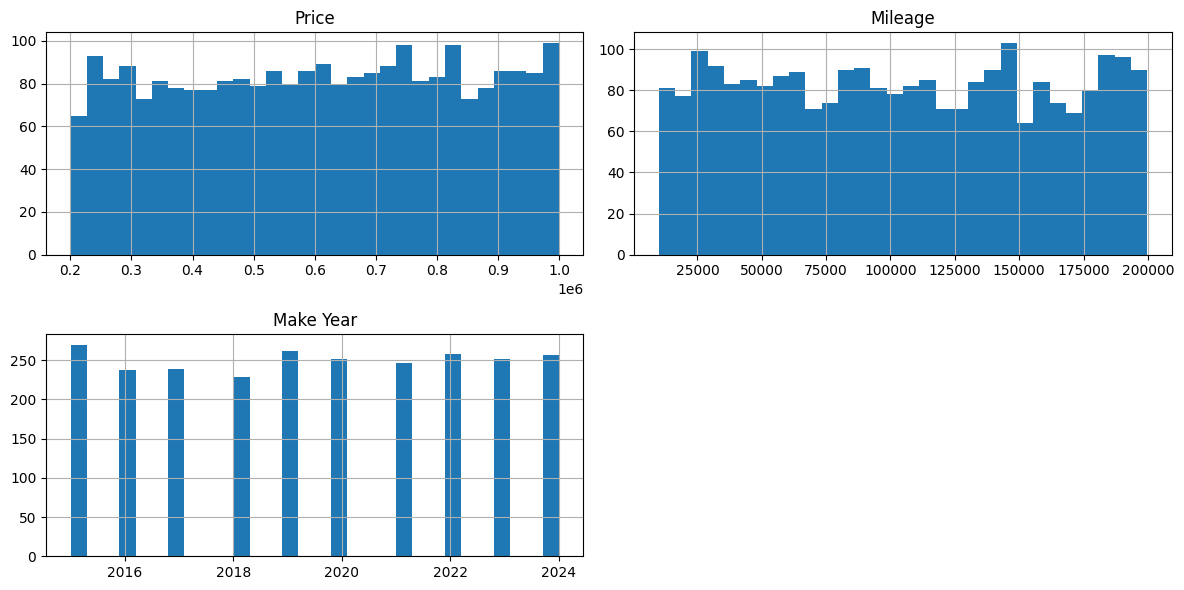

In [180]:
# Histogram of numerical features
num_cols = ['Price','Mileage','Make Year']
df[num_cols].hist(bins=30, figsize=(12,6))
plt.tight_layout()
plt.show()

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2500 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

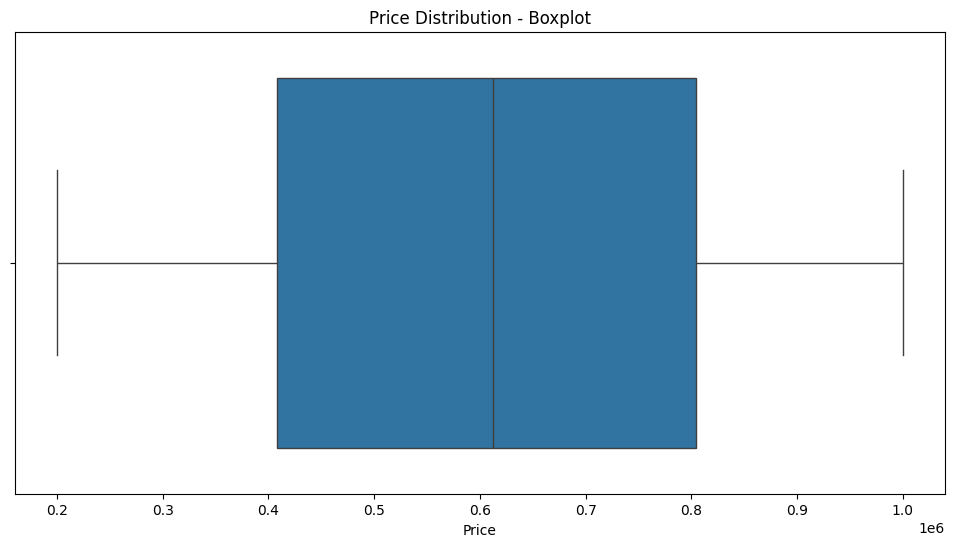

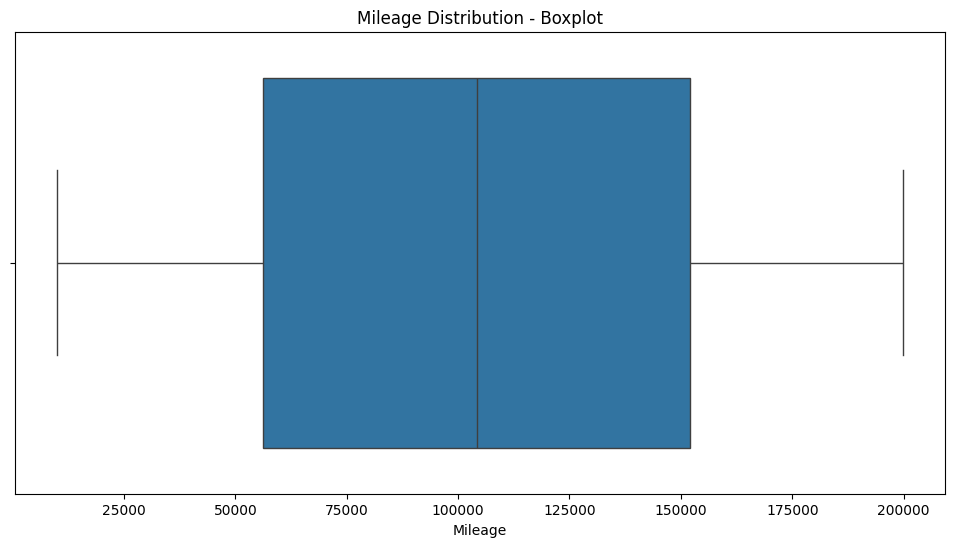

In [182]:
# Boxplots for detecting outliers
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Price'])
plt.title("Price Distribution - Boxplot")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x=df['Mileage'])
plt.title("Mileage Distribution - Boxplot")
plt.show()

In [183]:
df.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,Sunroof
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,Sunroof
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


In [184]:
df.columns

Index(['Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition',
       'Make Year', 'Owner Type', 'Registration Number', 'Mileage', 'Price',
       'Transmission Type', 'Body Color', 'Service Record', 'Insurance',
       'Registration Certificate', 'Accessories'],
      dtype='object')

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2500 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

In [186]:
df.shape

(2500, 16)

In [187]:
num_cols

['Price', 'Mileage', 'Make Year']

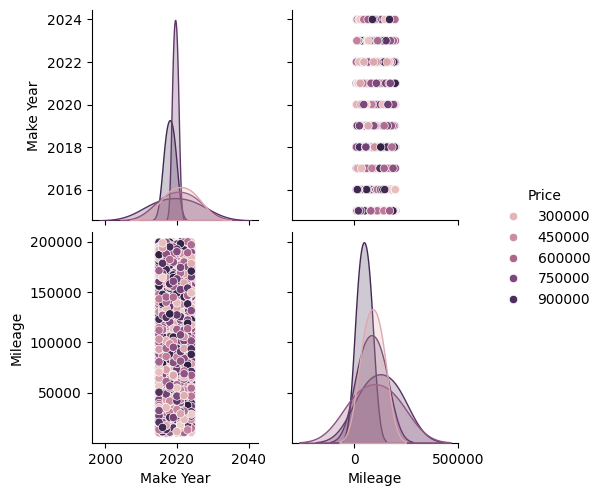

In [188]:
# Pairplot (slow on large dataset)
sns.pairplot(df, diag_kind="kde", hue="Price")
plt.show()

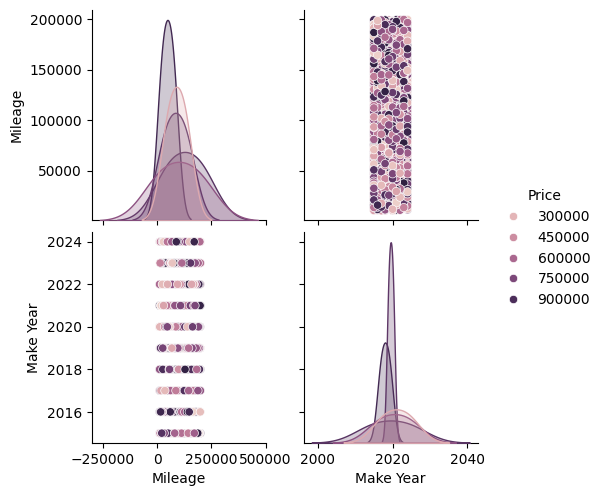

In [189]:
# Pairplot (slow on large dataset)
sns.pairplot(df[num_cols], diag_kind="kde", hue="Price")
plt.show()

# sample_features = ['Mileage', 'Price']

# # Sample the dataset speeds up pairplot
# df_sample = df[sample_features].sample(1500, random_state=42)

# # Create pairplot
# sns.pairplot(df_sample, diag_kind="kde", palette="Set2")
# plt.suptitle("Pairplot of Selected Features vs Target (Class)", y=1.02)
# plt.show()

In [190]:
# # Correlation heatmap
# plt.figure(figsize=(8,6))
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
# plt.title("Correlation Heatmap")
# plt.show()

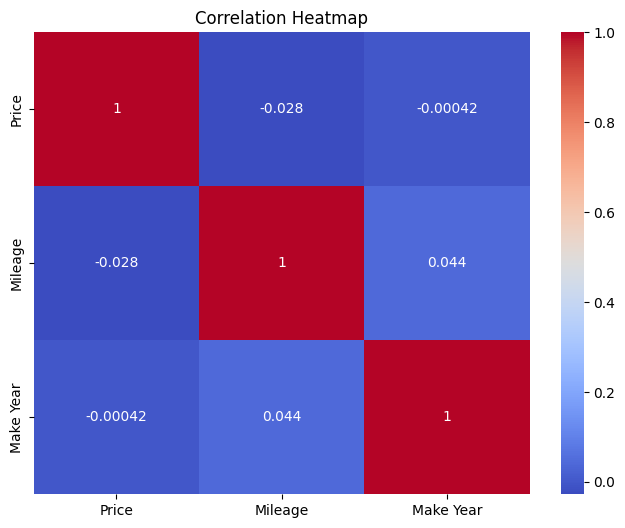

In [191]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2500 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

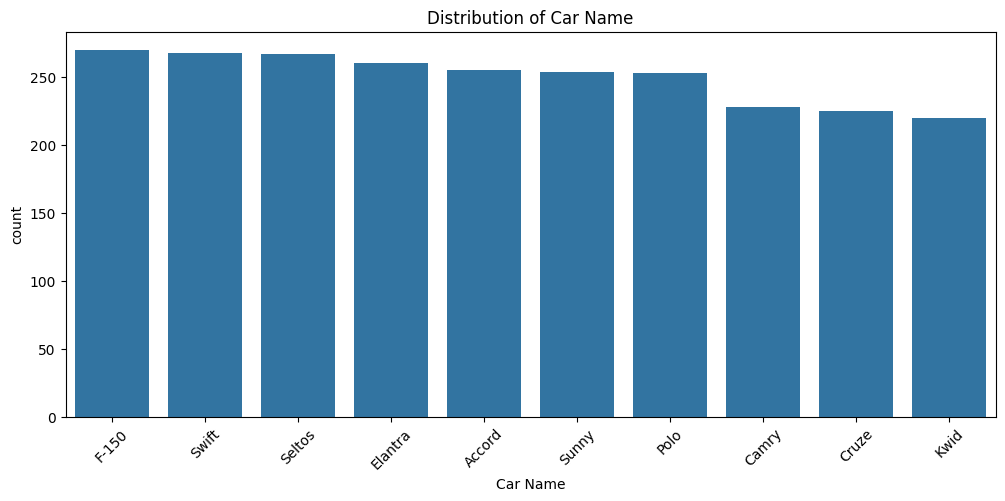

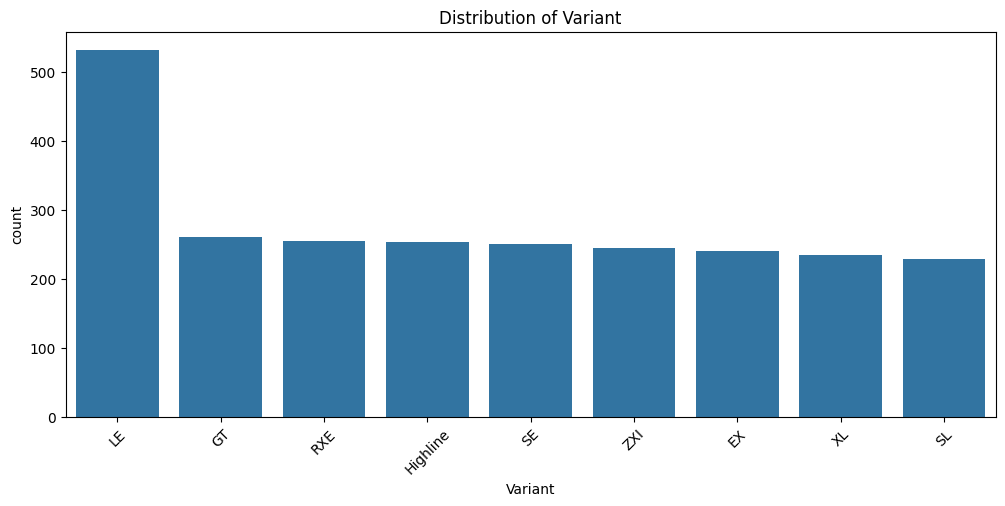

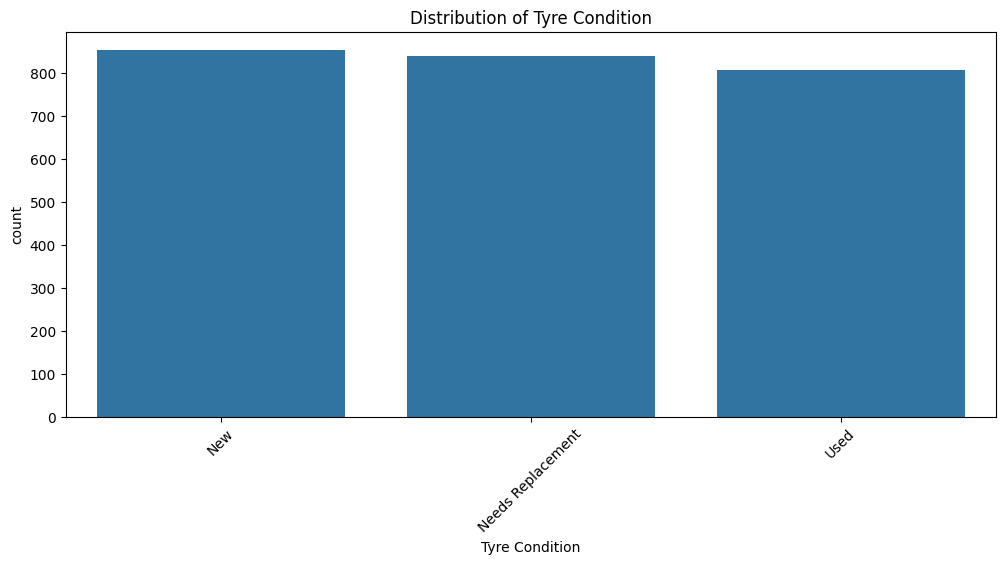

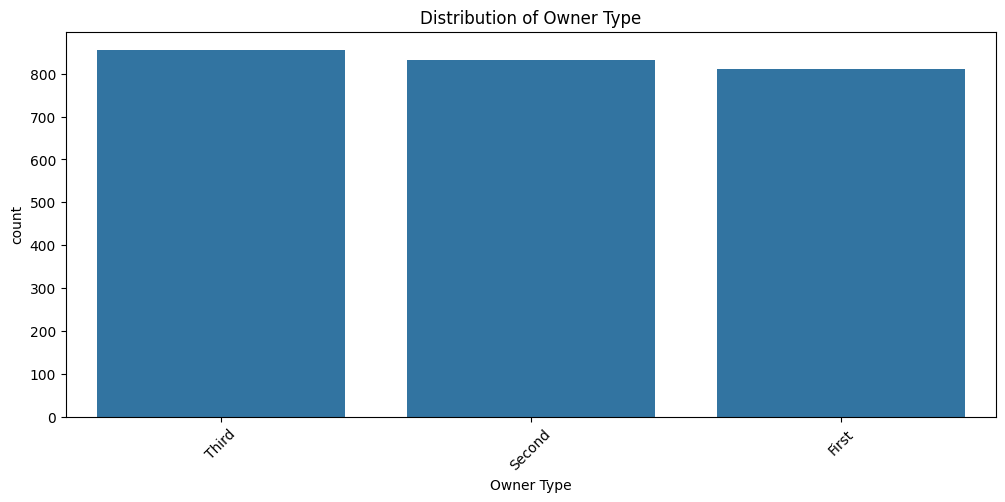

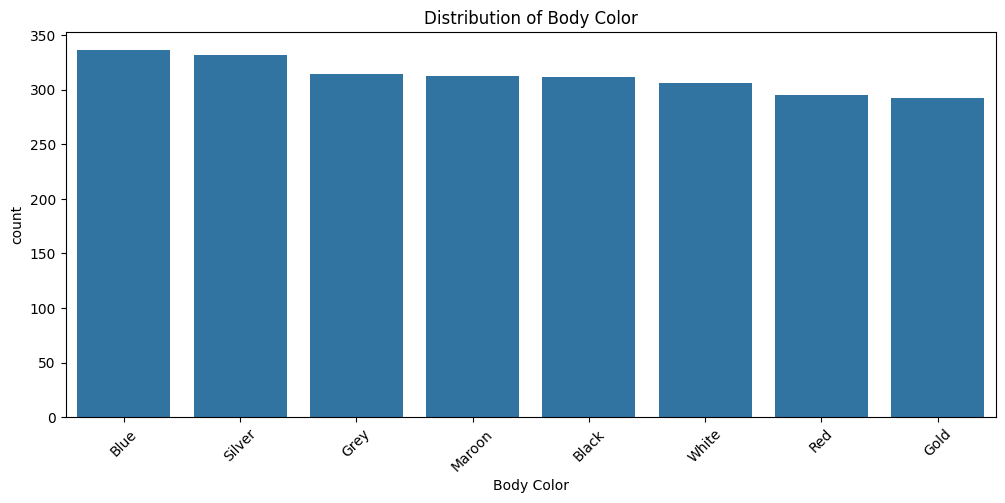

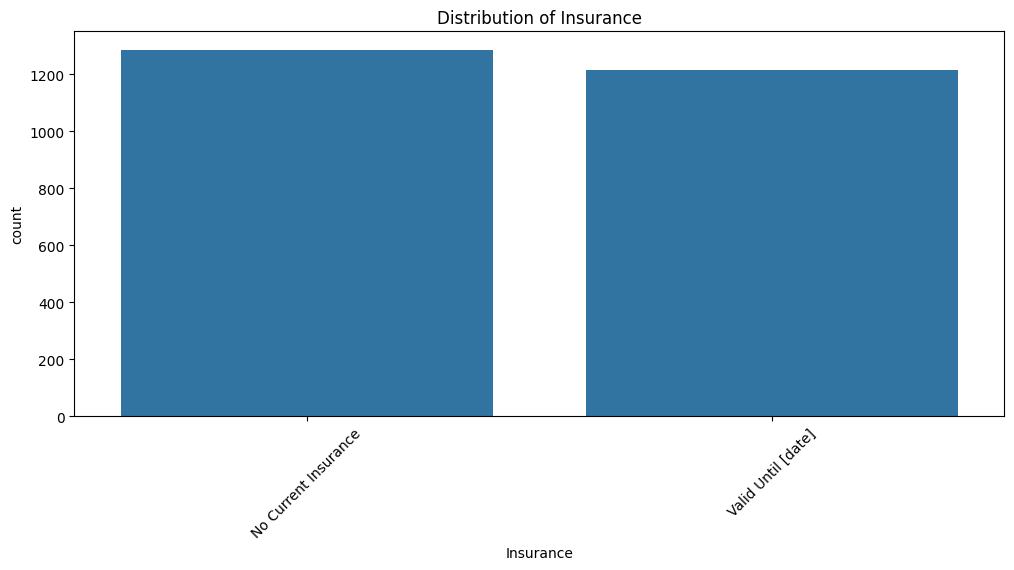

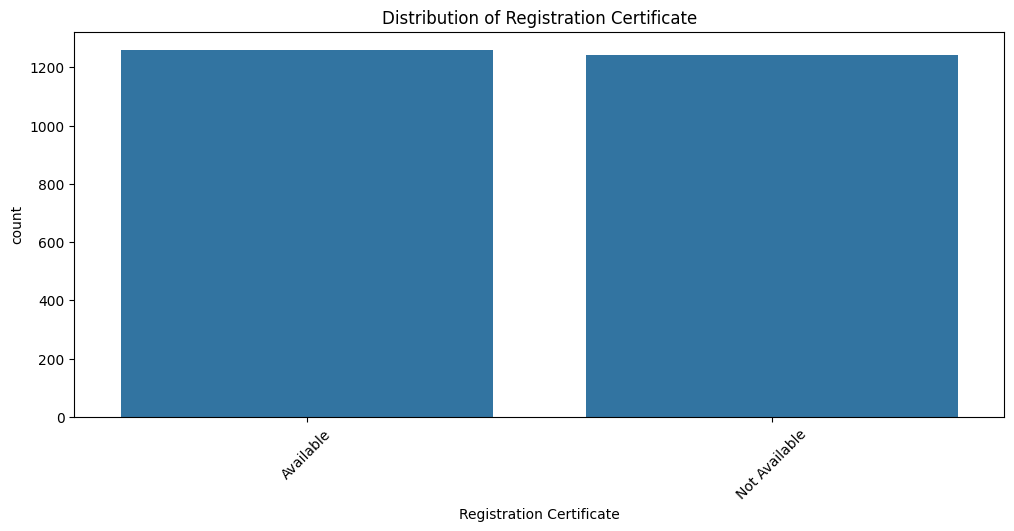

In [193]:
# Distribution of categorical variables
categorical_cols = ['Car Name','Variant','Tyre Condition',
                    'Owner Type','Body Color',
                    #'Service Record',
                    'Insurance','Registration Certificate']
                    #,'Accessories']  

for col in categorical_cols:
    plt.figure(figsize=(12,5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

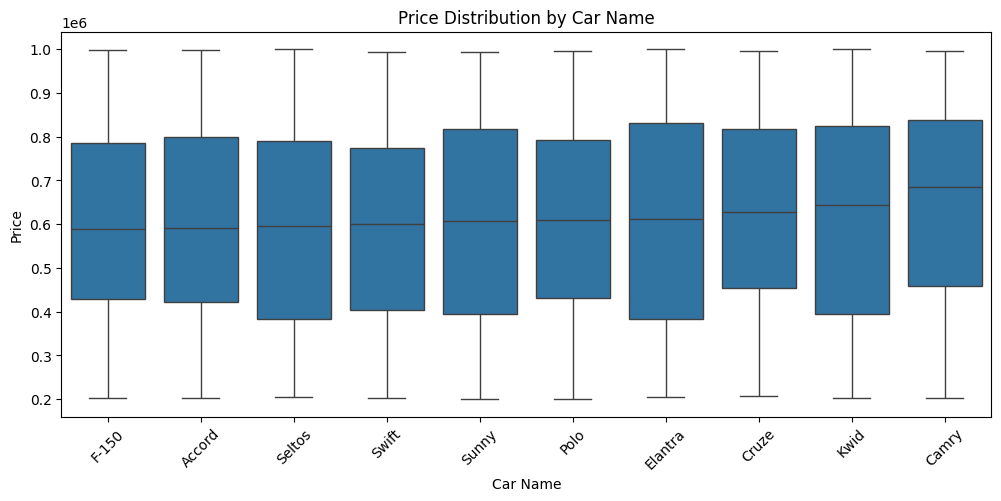

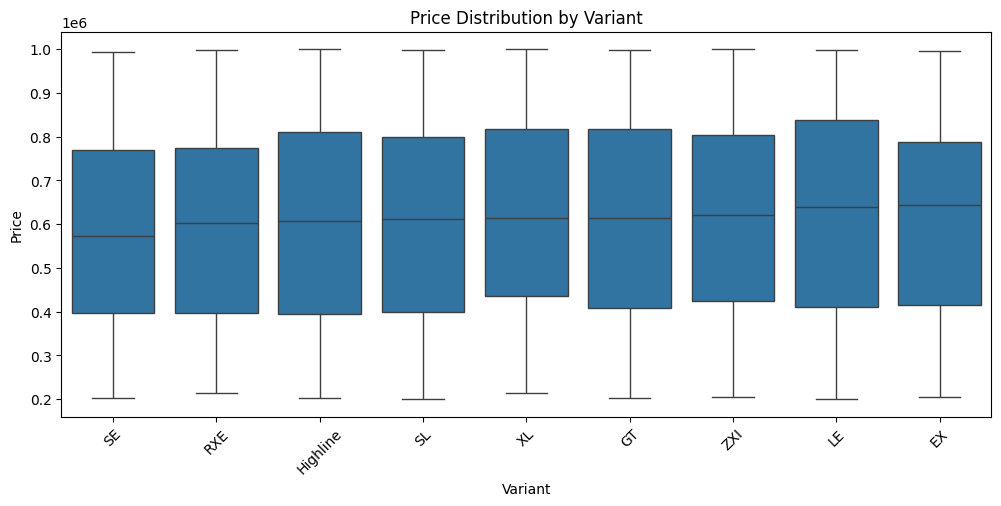

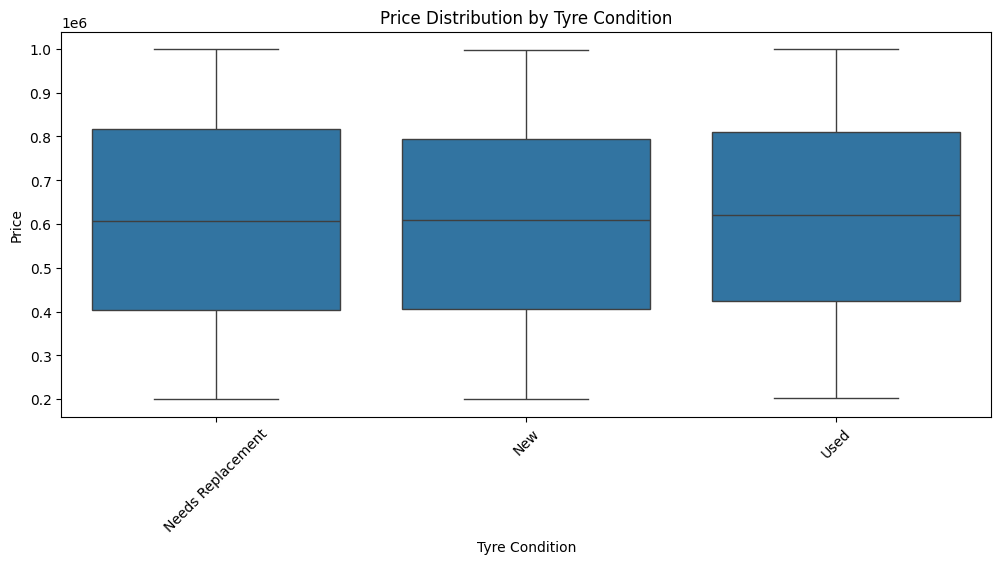

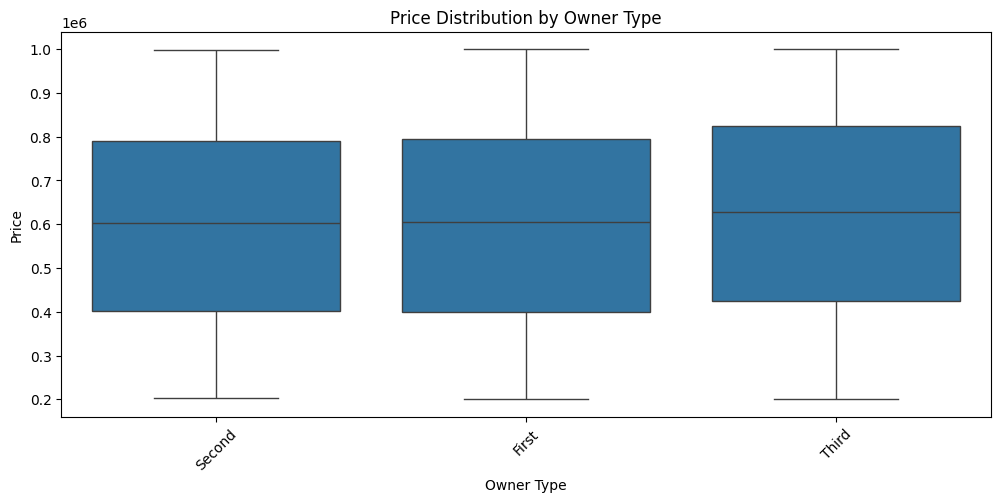

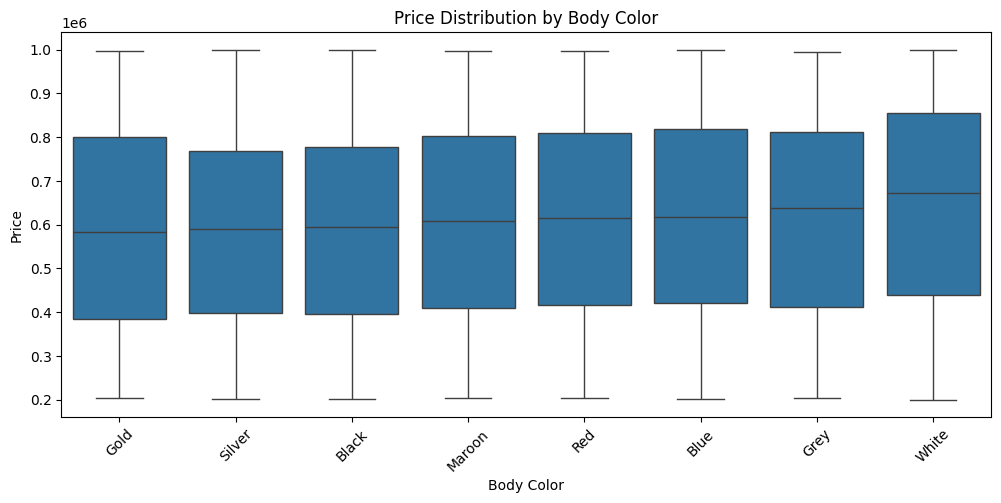

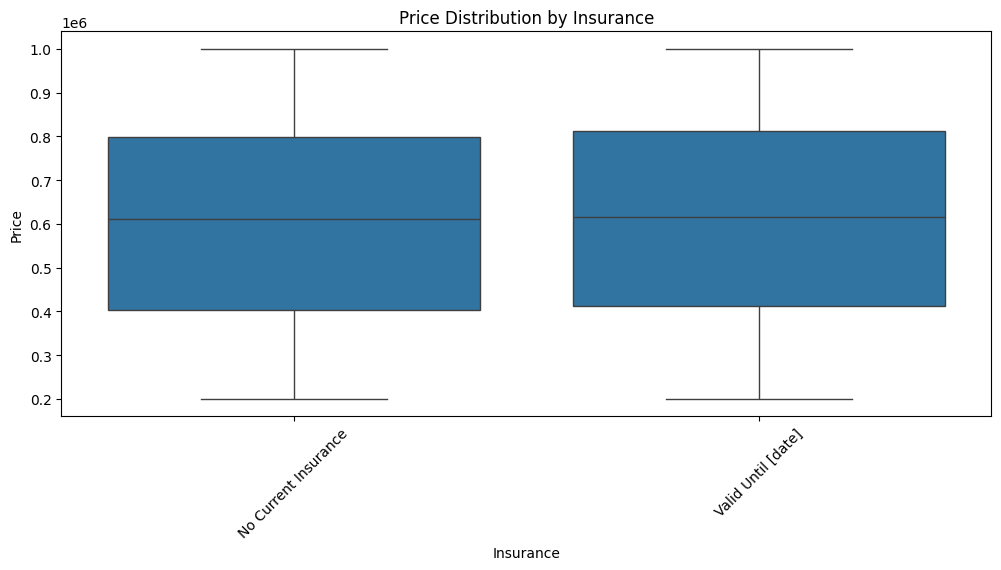

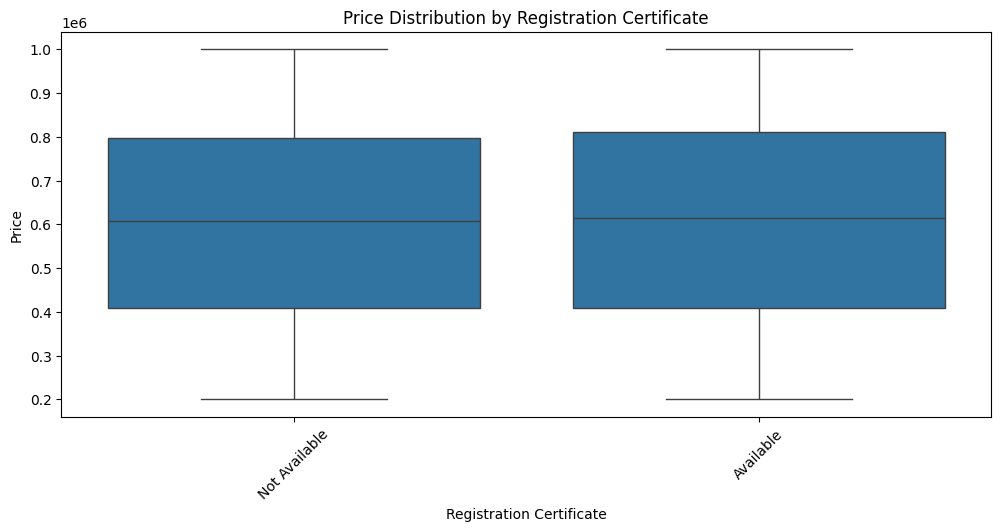

In [194]:
# Price distribution by categorical features (Boxplots)
for col in categorical_cols:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=col, y='Price', data=df, order=df.groupby(col)['Price'].median().sort_values().index)
    plt.title(f"Price Distribution by {col}")
    plt.xticks(rotation=45)
    plt.show()

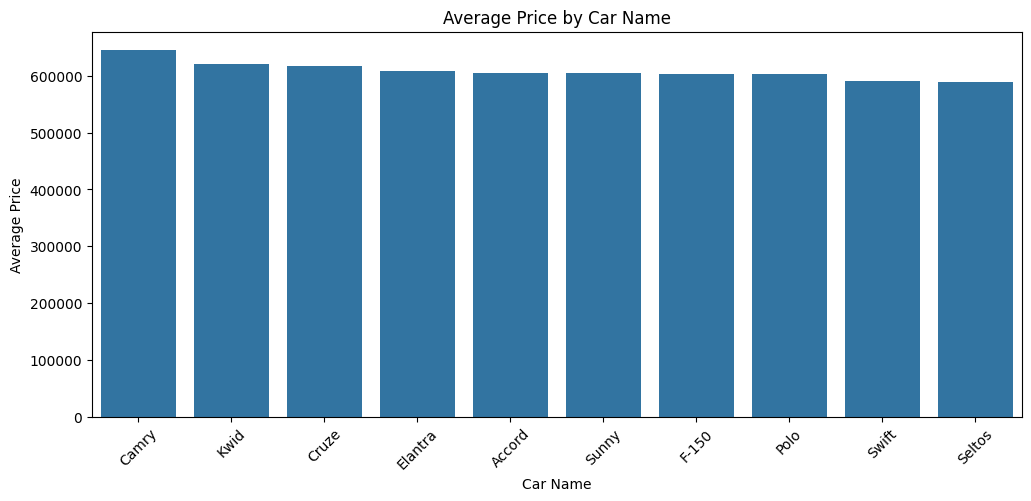

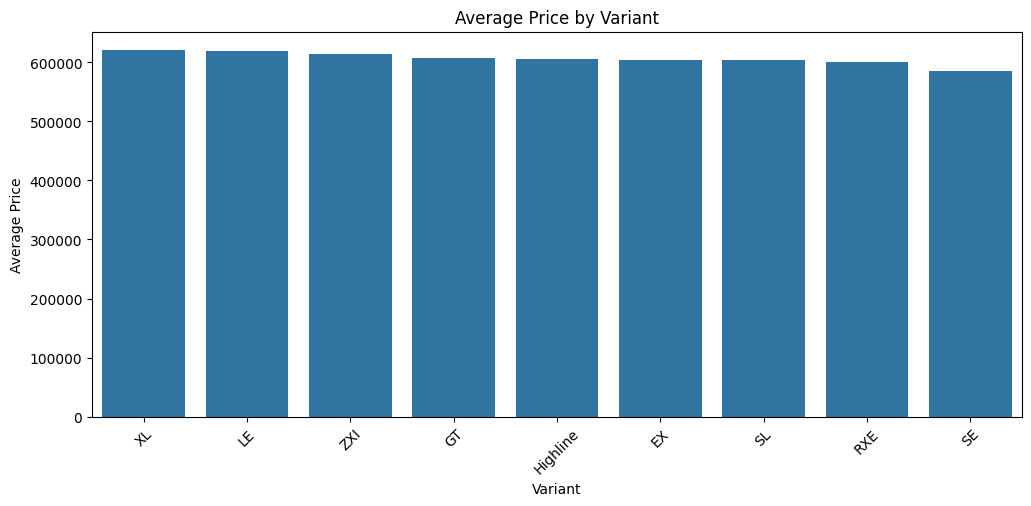

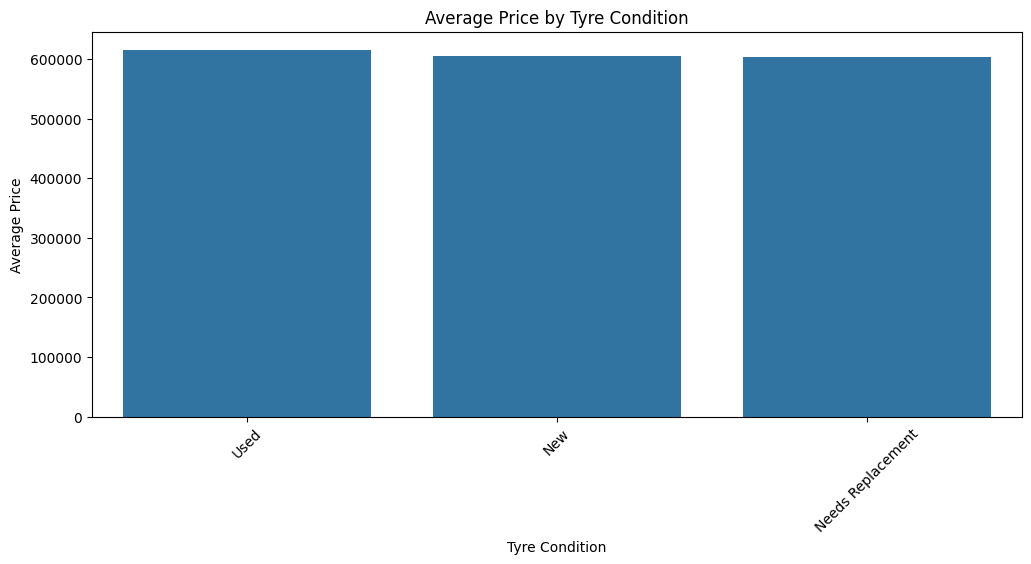

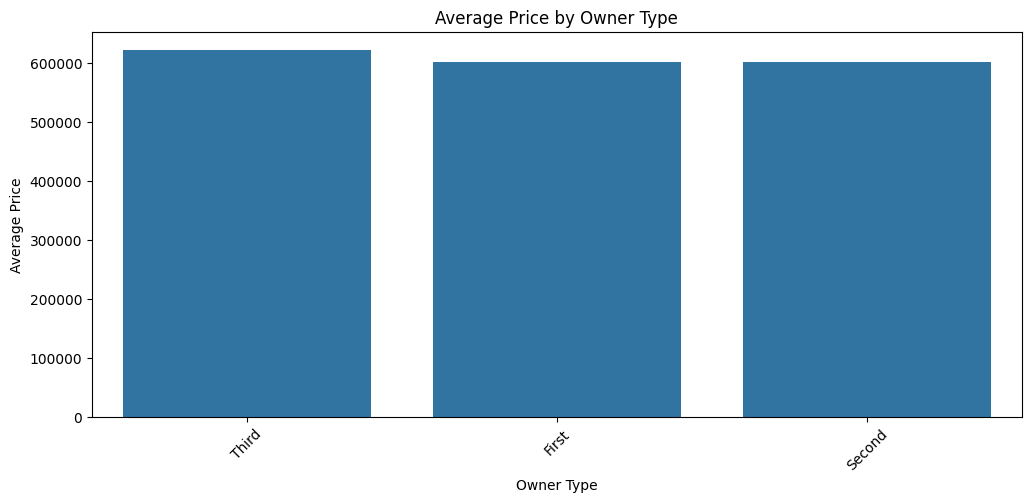

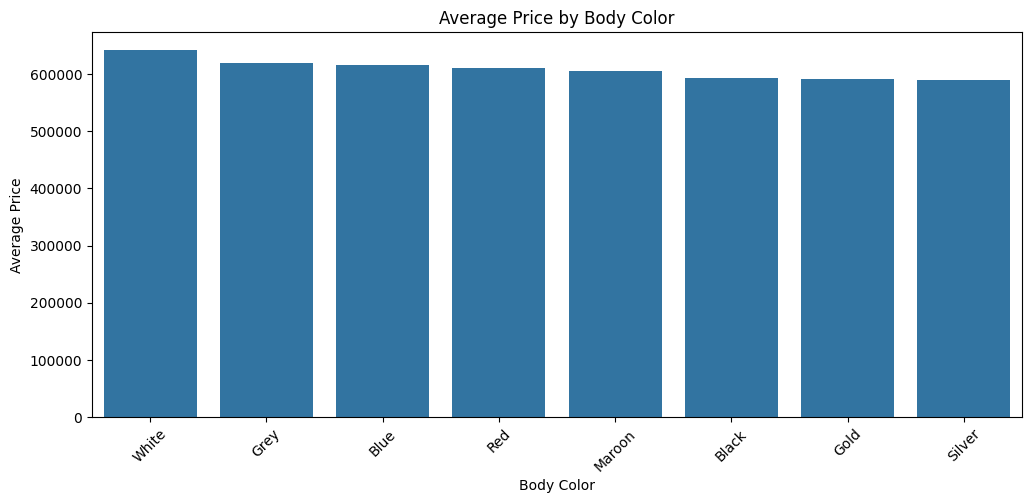

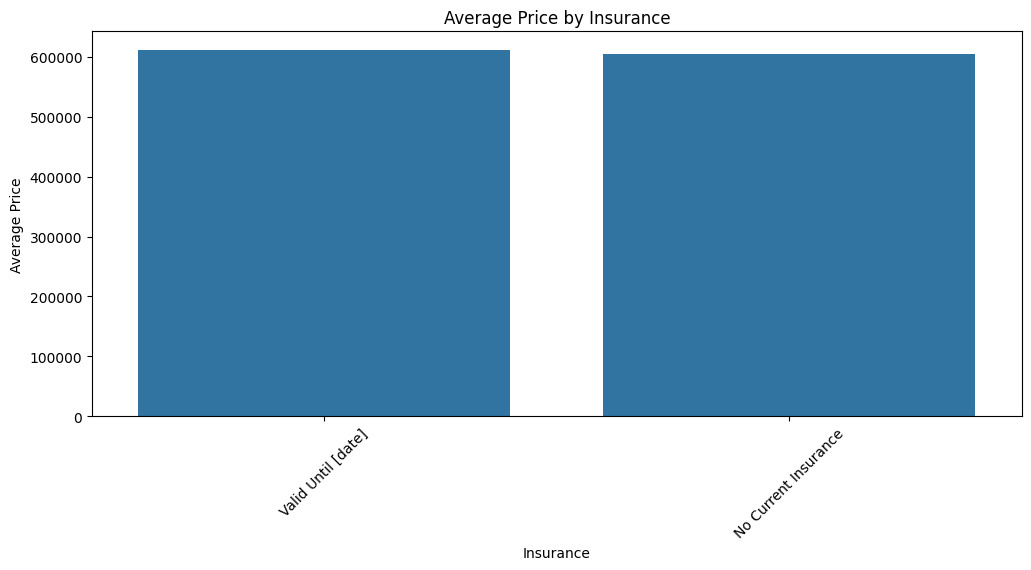

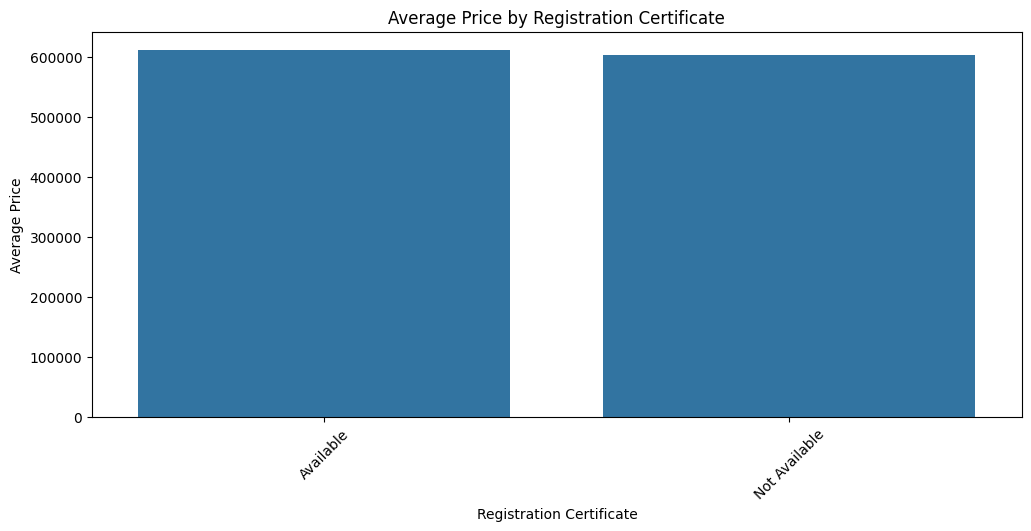

In [195]:
# Average price per category using Barplots
for col in categorical_cols:
    plt.figure(figsize=(12,5))
    avg_prices = df.groupby(col)['Price'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_prices.index, y=avg_prices.values)
    plt.title(f"Average Price by {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Average Price")
    plt.show()


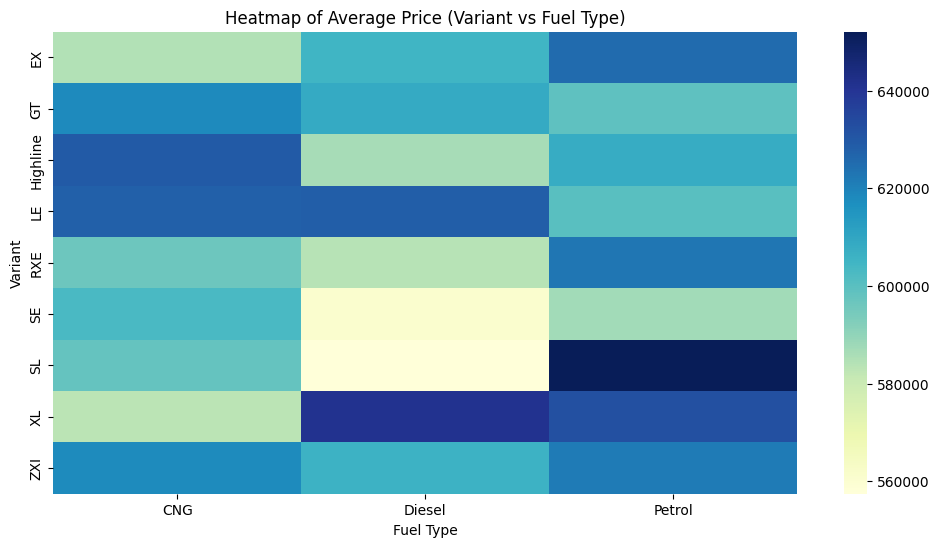

In [196]:
#Heatmap of average price across two categorical features 
# (e.g make vs fuel)
pivot_table = df.pivot_table(values='Price', index='Variant', columns='Fuel Type', aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=False, cmap="YlGnBu")
plt.title("Heatmap of Average Price (Variant vs Fuel Type)")
plt.show()


### **Feature Engineering**

In [197]:
df.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,Sunroof
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,Sunroof
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


In [198]:
import datetime

# create new features
current_year = datetime.datetime.now().year
df['car_age'] = current_year - df['Make Year']
df['price_per_mile'] = df['Price'] / (df['Mileage'])
                                      #+1)  # +1 to avoid division by zero

In [199]:
df.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories,car_age,price_per_mile
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels",7,14.377571
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,Sunroof,5,11.634364
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,Sunroof,3,6.672219
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels",1,6.865880
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System",7,8.304536


In [200]:
# define features and target
X = df.drop(columns=['Price'])
y = df['Price']

### **Encoding & Scaling**

In [201]:
num_cols

['Price', 'Mileage', 'Make Year']

In [202]:
# Remove 'Make Year' from num_cols list
num_cols = [col for col in num_cols if col != 'Make Year']


In [203]:
num_cols

['Price', 'Mileage']

In [204]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

print("Cat:", categorical_cols)
print("Num:", numerical_cols)

Cat: ['Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition', 'Owner Type', 'Registration Number', 'Transmission Type', 'Body Color', 'Service Record', 'Insurance', 'Registration Certificate', 'Accessories']
Num: ['Make Year', 'Mileage', 'car_age', 'price_per_mile']


In [205]:
numerical_cols = [col for col in numerical_cols if col != 'Make Year']

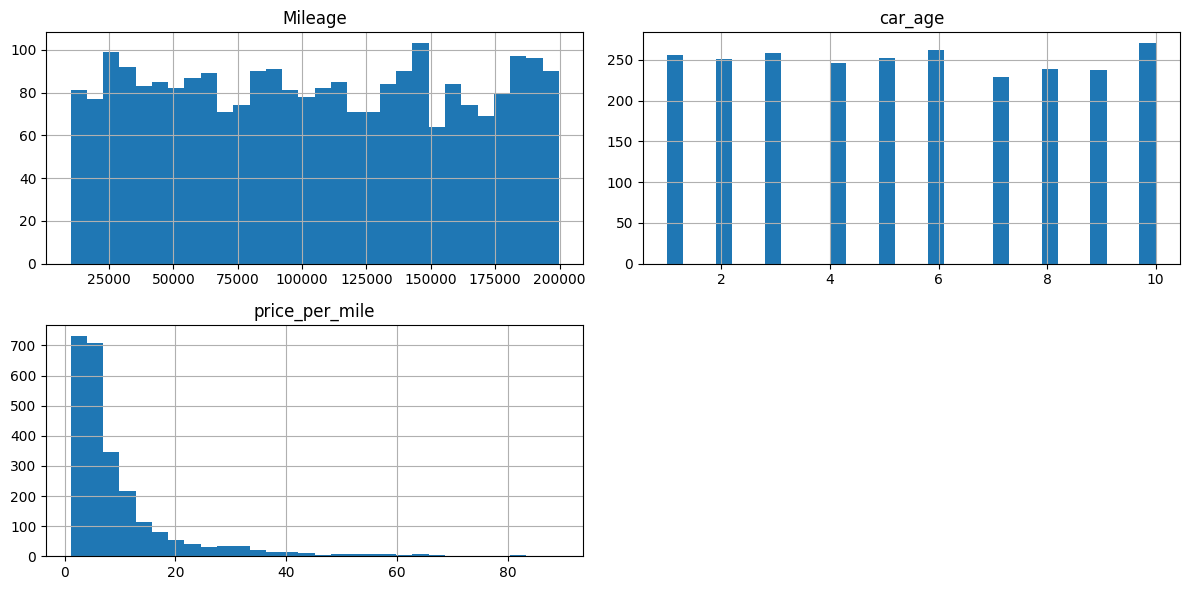

In [206]:
#distribution of the numeric features

df[numerical_cols].hist(bins=30, figsize=(12,6))
plt.tight_layout()
plt.show()

In [207]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

# preprocessing pipeline
# Separate numerical groups
num_minmax = ['Mileage', 'car_age']
num_robust = ['price_per_mile']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num_minmax', MinMaxScaler(), num_minmax),
        ('num_robust', RobustScaler(), num_robust),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)
#Each tuple inside transformers=[ ... ] has the format: (name/label, transformer(), columns)

# Apply transformation
X_new = preprocessor.fit_transform(X)

print("Shape after preprocessing:", X_new.shape)


Shape after preprocessing: (2500, 3608)


### **PCA for Dimensionality Reduction**

Original shape: (2500, 3608)
Reduced shape: (2500, 989)


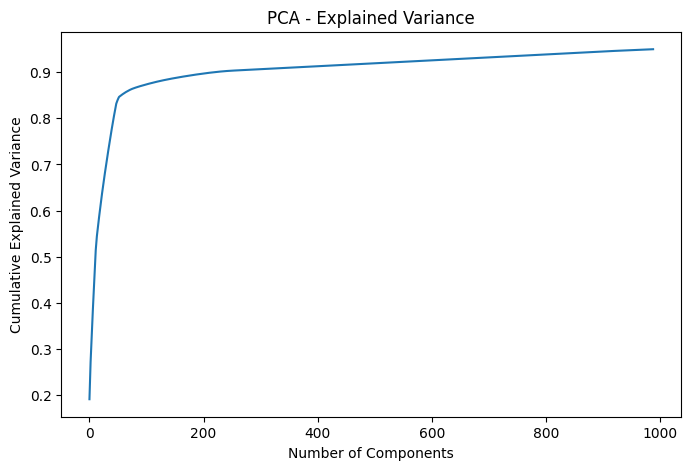

In [208]:
#pca
pca = PCA(n_components=0.95) 
#keep 95% variance
# pca = PCA(n_components=0.90) 
X_pca = pca.fit_transform(X_new.toarray() if hasattr(X_new, "toarray") else X_new)

#converting to dense array if sparse
#fit_transform both learns the principal components and applies the transformation to reduce the dataset:
#fit → learns the directions (principal components) in which the data varies the most.
#transform → projects your original data onto these directions (reduces dimensions).

print("Original shape:", X_new.shape)
print("Reduced shape:", X_pca.shape)
#PCA compresses your dataset into fewer features so models can train better and faster.

# plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

#pca.explained_variance_ratio_ = fraction of variance explained by each component i.e how different they get to be
# np.cumsum(...) = cumulative sum → shows how variance builds up across components.

plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
# plt.grid(True)
plt.show()

### **Modeling & Evaluation**

In [209]:
# 6. Modeling and Evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# 6.1 Train-Test Split
# For original features
X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    X_new.toarray() if hasattr(X_new, "toarray") else X_new,
    y,
    test_size=0.2,
    random_state=42
)

# For PCA-reduced features
X_train_pca, X_test_pca, _, _ = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# 6.2 Model Selection: Multiple Models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Support Vector Regressor": SVR(kernel="rbf"),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.1),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=300, learning_rate=0.1, max_depth=6)
}

results = []

for name, model in models.items():
    # --- Train & Evaluate on Original Features ---
    model.fit(X_train_orig, y_train)

    # Training predictions
    y_train_pred_orig = model.predict(X_train_orig)
    rmse_train_orig = np.sqrt(mean_squared_error(y_train, y_train_pred_orig))
    r2_train_orig = r2_score(y_train, y_train_pred_orig)

    # Test predictions
    y_test_pred_orig = model.predict(X_test_orig)
    rmse_test_orig = np.sqrt(mean_squared_error(y_test, y_test_pred_orig))
    r2_test_orig = r2_score(y_test, y_test_pred_orig)

    results.append([name, "Original", "Train", rmse_train_orig, r2_train_orig])
    results.append([name, "Original", "Test", rmse_test_orig, r2_test_orig])

    # --- Train & Evaluate on PCA Features ---
    model.fit(X_train_pca, y_train)

    # Training predictions
    y_train_pred_pca = model.predict(X_train_pca)
    rmse_train_pca = np.sqrt(mean_squared_error(y_train, y_train_pred_pca))
    r2_train_pca = r2_score(y_train, y_train_pred_pca)

    # Test predictions
    y_test_pred_pca = model.predict(X_test_pca)
    rmse_test_pca = np.sqrt(mean_squared_error(y_test, y_test_pred_pca))
    r2_test_pca = r2_score(y_test, y_test_pred_pca)

    results.append([name, "PCA", "Train", rmse_train_pca, r2_train_pca])
    results.append([name, "PCA", "Test", rmse_test_pca, r2_test_pca])

results_df = pd.DataFrame(results, columns=["Model", "Features", "Dataset", "RMSE", "R2 Score"])
print(results_df)


                       Model  Features Dataset          RMSE      R2 Score
0          Linear Regression  Original   Train  3.020163e-09  1.000000e+00
1          Linear Regression  Original    Test  2.196989e+05  1.290167e-01
2          Linear Regression       PCA   Train  1.550940e+05  5.447039e-01
3          Linear Regression       PCA    Test  4.509426e+17 -3.669414e+24
4              Random Forest  Original   Train  8.360833e+03  9.986769e-01
5              Random Forest  Original    Test  2.055222e+04  9.923780e-01
6              Random Forest       PCA   Train  3.189399e+04  9.807460e-01
7              Random Forest       PCA    Test  7.690013e+04  8.932892e-01
8   Support Vector Regressor  Original   Train  2.299225e+05 -6.150103e-04
9   Support Vector Regressor  Original    Test  2.359555e+05 -4.649165e-03
10  Support Vector Regressor       PCA   Train  2.299234e+05 -6.224667e-04
11  Support Vector Regressor       PCA    Test  2.359567e+05 -4.658895e-03
12         Gradient Boost

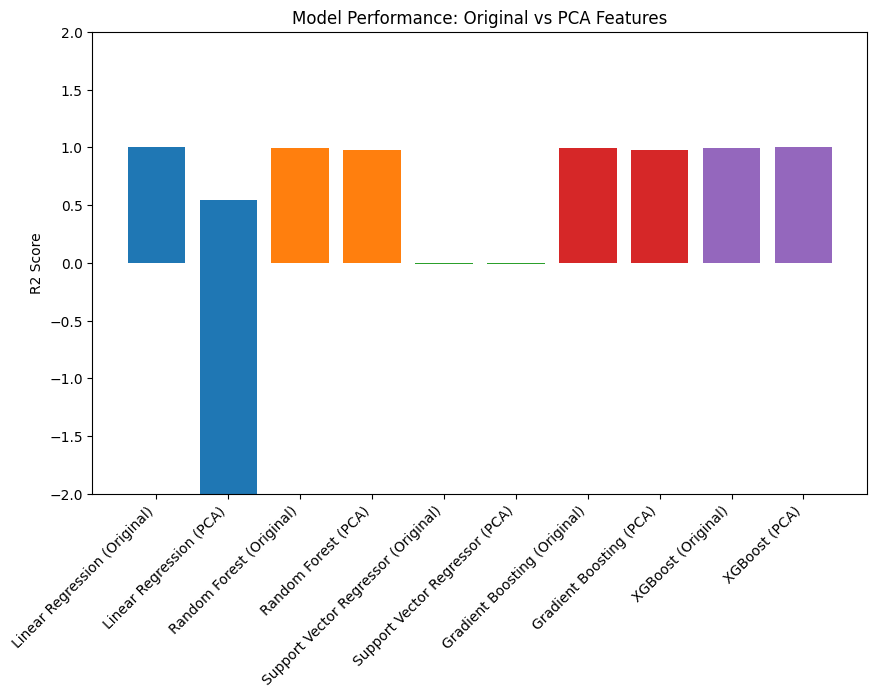

In [210]:
# --- 6.4 Visualization of Results ---
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for model in results_df["Model"].unique():
    subset = results_df[results_df["Model"] == model]
    plt.bar(
        [f"{model} ({feat})" for feat in subset["Features"]],
        subset["R2 Score"],
        label=model
    )

plt.xticks(rotation=45, ha="right")
plt.ylabel("R2 Score")
plt.title("Model Performance: Original vs PCA Features")

# Limit the y-axis scale
plt.ylim(-2, 2)
plt.show()

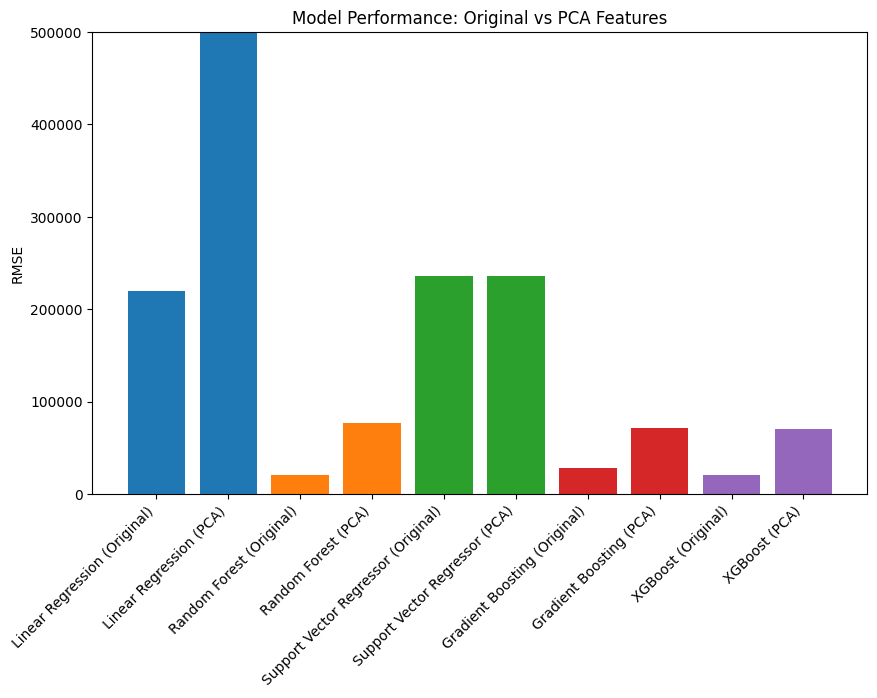

In [211]:
# --- 6.4 Visualization of Results ---
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for model in results_df["Model"].unique():
    subset = results_df[results_df["Model"] == model]
    plt.bar(
        [f"{model} ({feat})" for feat in subset["Features"]],
        subset["RMSE"],
        label=model
    )

plt.xticks(rotation=45, ha="right")
plt.ylabel("RMSE")
plt.title("Model Performance: Original vs PCA Features")
plt.ylim(0, 5e5)
plt.show()

In [212]:
#Modeling & Evaluation

# Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [213]:
# Predictions
y_pred = model.predict(X_test)

In [214]:
print(y_train.shape)
print(X_train.shape)
print()
print(y_test.shape)
print(X_test.shape)
print()
print(y_pred.shape)

(2000,)
(2000, 989)

(500,)
(500, 989)

(500,)


In [215]:
# # Perfomance
# # print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred)))
# # print("R2 Score:", r2_score(y_train, y_pred))

# # Perfomance
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# print("R2 Score:", r2_score(y_test, y_pred))

Original shape (rows, columns): (2500, 3608)
Reduced shape (rows, columns): (2500, 219)


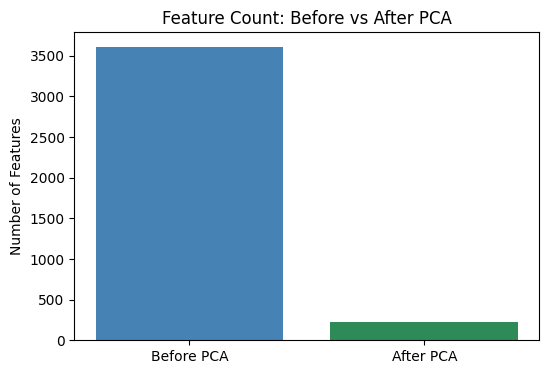

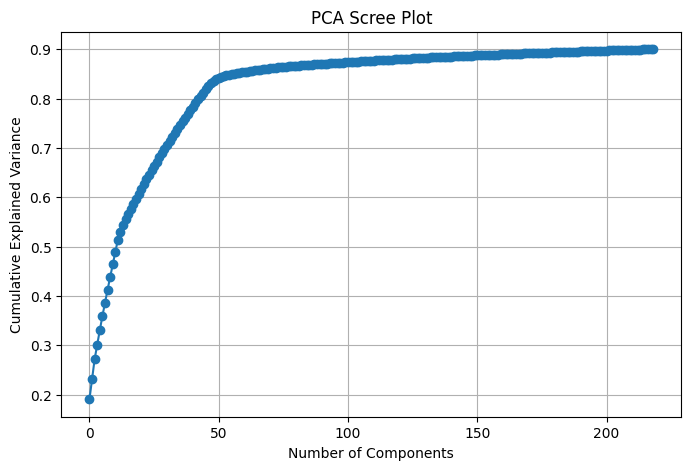

In [216]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# --- BEFORE PCA ---
print("Original shape (rows, columns):", X_new.shape)

# --- APPLY PCA ---
pca = PCA(n_components=0.90)   # keep 90% variance
X_pca = pca.fit_transform(X_new.toarray() if hasattr(X_new, "toarray") else X_new)

print("Reduced shape (rows, columns):", X_pca.shape)

# --- VISUAL COMPARISON ---
plt.figure(figsize=(6,4))
plt.bar(["Before PCA", "After PCA"], 
        [X_new.shape[1], X_pca.shape[1]], 
        color=["steelblue", "seagreen"])
plt.ylabel("Number of Features")
plt.title("Feature Count: Before vs After PCA")
plt.show()

# --- SCREE PLOT (how variance accumulates with components) ---
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Scree Plot")
plt.grid(True)
plt.show()


In [217]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# define into a dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

# Training, prediction, evaluation
for name, model in models.items():
    model.fit(X_train, y_train)         # Train
    y_pred = model.predict(X_test)      # Predict
    #evaluate
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2": r2}


results_df = pd.DataFrame(results).T
print(results_df)
#pick the model with the lowest RMSE and highest R².


c:\Users\Yvonne\Desktop\DATA SCIENCE\advanced ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.420e+13, tolerance: 1.057e+10
  model = cd_fast.enet_coordinate_descent(


                           RMSE            R2
Linear Regression  4.509426e+17 -3.669414e+24
Ridge Regression   2.216809e+05  1.132307e-01
Lasso Regression   9.918416e+05 -1.675165e+01
Random Forest      7.690013e+04  8.932892e-01
Gradient Boosting  7.466719e+04  8.993963e-01


In [218]:
# # Compute the components and projected faces
# pca = RandomizedPCA(150).fit(df.data)
# components = pca.transform(df.data)
# projected = pca.inverse_transform(components)